In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [232]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [72]:
df[df.duplicated()]

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points


In [73]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [233]:
df.drop(['Id'], axis = 1, inplace=True)

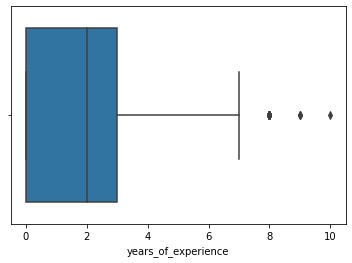

In [75]:
sns.boxplot(x=df['years_of_experience'])

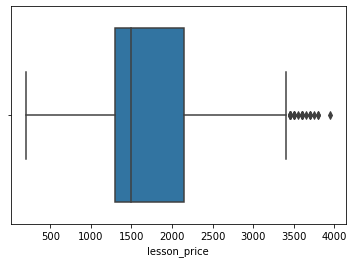

In [76]:
sns.boxplot(x=df['lesson_price'])

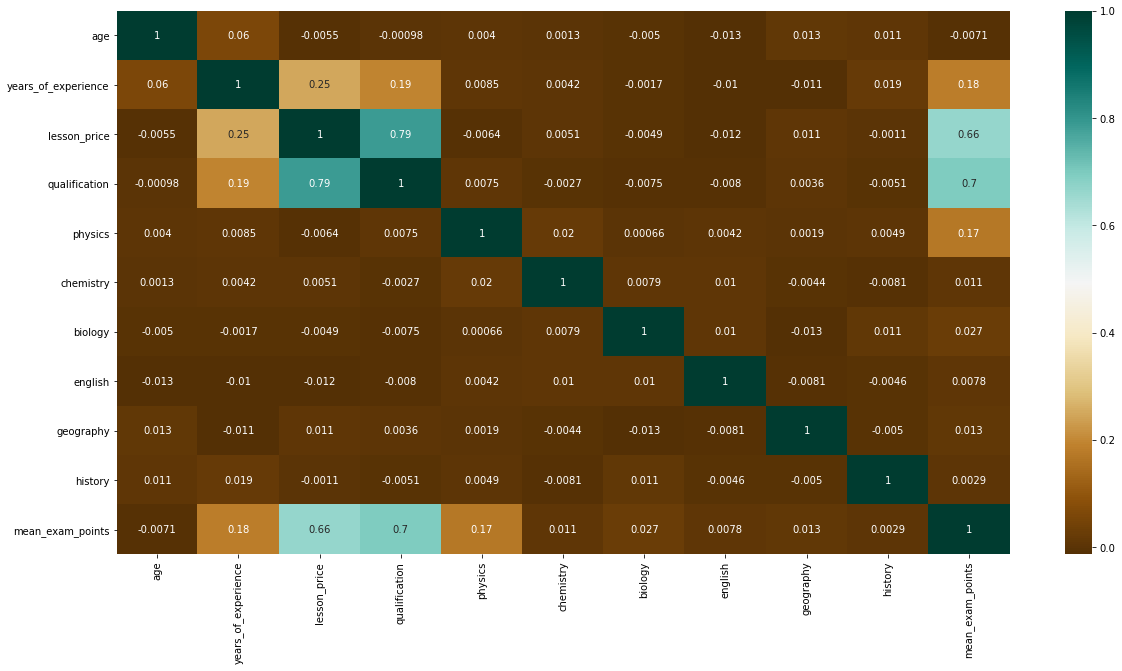

In [77]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [78]:
c['mean_exam_points'][:-1].sort_values(ascending=False)


qualification          0.698261
lesson_price           0.664061
years_of_experience    0.184599
physics                0.169535
biology                0.026535
geography              0.013323
chemistry              0.010640
english                0.007755
history                0.002858
age                   -0.007144
Name: mean_exam_points, dtype: float64

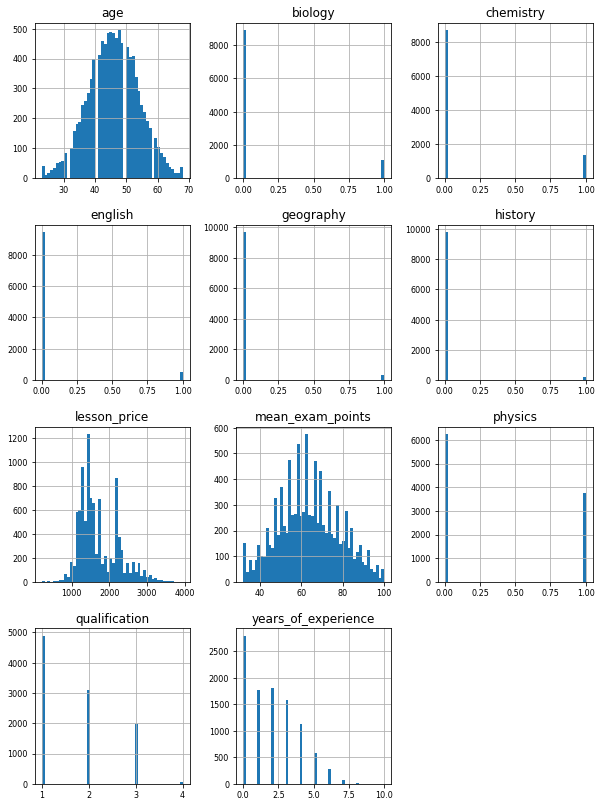

In [79]:
df.hist(figsize=(10, 14), bins=50, xlabelsize=8, ylabelsize=8) ;

In [48]:
df['qualification'].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

In [52]:
df['geography'].value_counts()

0.0    9679
1.0     321
Name: geography, dtype: int64

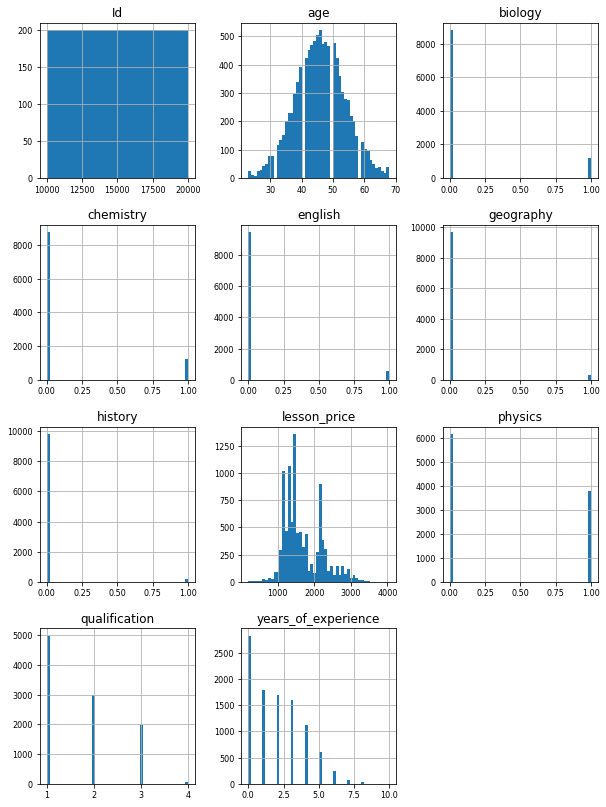

In [57]:
df_test.hist(figsize=(10, 14), bins=50, xlabelsize=8, ylabelsize=8) ;

In [234]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [235]:
df_std = df.copy()

In [236]:
df_std[['lesson_price','years_of_experience','age']] = standard_scale(df[['lesson_price','years_of_experience','age']])

In [237]:
df_std

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,-0.730737,-1.121084,-0.569847,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,0.263801,1.135981,2.192654,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,-0.855055,-1.121084,-0.950881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,0.015167,1.700247,-0.569847,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,-0.357785,-0.556818,-0.379330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.233468,-1.121084,0.001705,2.0,1.0,1.0,0.0,0.0,0.0,0.0,83
9996,0.636754,-1.121084,0.001705,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58
9997,-1.476642,-0.556818,-0.855623,1.0,1.0,0.0,0.0,0.0,0.0,0.0,62
9998,-1.600959,0.571714,-1.141399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56


In [238]:
X=df_std.drop(['mean_exam_points'], axis=1)
y=df_std['mean_exam_points']

In [239]:
Y

0       61
1       76
2       53
3       54
4       57
        ..
9995    83
9996    58
9997    62
9998    56
9999    52
Name: mean_exam_points, Length: 10000, dtype: int64

### Модели

Linear regression using STG
***

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [241]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [571]:
def r2_score(y, y_pred):
    return 1 - np.mean((y - y_pred)**2)/np.mean((y - np.mean(y))**2)
    # return 1 - (sum((y - y_pred)**2)/sum((y-np.mean(y))**2))

In [250]:
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1, intercept = True):
    if intercept:
        X_train = X.copy()
        X_train['w0'] = 1
    W = np.random.randn(X_train.shape[1])
    n = X_train.shape[0]
    
    errors = []
    w_list = [W.copy()]

    for i in range(0, iterations):
        train_ind = np.random.randint(X_train.shape[0], size=size)

        y_pred = np.dot(X_train.iloc[train_ind], W)
        W = W - eta * 2 / Y.iloc[train_ind].shape[0] * np.dot(X_train.iloc[train_ind].T, y_pred - Y.iloc[train_ind])

        error = calc_mse(Y, np.dot(X_train, W))
        errors.append(error)
        w_list.append(W)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X_train, W))}')
    return W, errors, w_list

In [278]:
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X_train, y_train, iterations=30000, eta=3e-3, size=1)

Iter: 0, error 4333.907312918915
Iter: 3000, error 111.02345658057875
Iter: 6000, error 105.3161283365227
Iter: 9000, error 97.8540317835197
Iter: 12000, error 98.74732760180622
Iter: 15000, error 99.71166775237593
Iter: 18000, error 104.45188642612602
Iter: 21000, error 98.25720766955072
Iter: 24000, error 100.42035603353207
Iter: 27000, error 102.48792897854447
Final MSE: 98.4547733891798


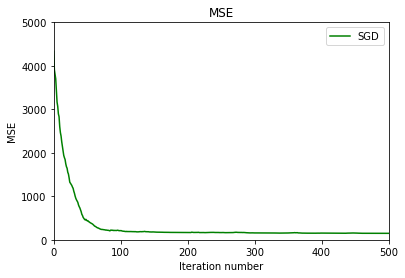

In [326]:
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 500)
plt.ylim(0,5000)
plt.legend();

In [280]:
X_test_mse= X_test.copy()
X_test_mse['w0'] = 1
print(f'MSE: {calc_mse(y_test, np.dot(X_test_mse, weights_SGD))}')
print(f'R2: {r2_score(y_test, np.dot(X_test_mse, weights_SGD))}')

MSE: 98.0917955542909
R2: 0.5481204932324023


In [281]:
X_train_mse= X_train.copy()
X_train_mse['w0'] = 1
print(f'MSE: {calc_mse(y_train, np.dot(X_train_mse, weights_SGD))}')
print(f'R2: {r2_score(y_train, np.dot(X_train_mse, weights_SGD))}')

MSE: 98.4547733891798
R2: 0.543963063580293


In [283]:
weights_SGD

array([ 0.35128927, -0.24030609,  4.55142775,  9.04439843,  4.17313565,
        0.24903339,  2.11237634,  1.91962458, -0.12782054,  0.23548232,
       46.83354106])

In [290]:
df_test.drop(['Id'], axis=1)

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,42.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,51.0,2.0,2200.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
df_test_w0 = df_test.drop(['Id'], axis=1)
df_test_w0['w0'] = 1

df_test_pred = np.dot(df_test_w0, weights_SGD)

In [299]:
df_test_w0[['lesson_price','years_of_experience','age']] = standard_scale(df_test_w0[['lesson_price','years_of_experience','age']])

In [300]:
df_test_pred = np.dot(df_test_w0, weights_SGD)

In [318]:
export =pd.DataFrame({'Id': df_test['Id'], 'mean_exam_points':df_test_pred})

In [322]:
export.to_csv('mysubmission.csv', index=False)

Random forest Regressor
***

In [499]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [500]:
class Leaf:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()

In [501]:
def mse(targets):
    return np.mean((targets - targets.mean())**2)

In [514]:
def find_best_split(data, targets):
    
    #  обозначим минимальное количество объектов в узле
    min_samples_leaf = 10

    root_mse = mse(targets)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data.iloc[:,index])
        
        for t in t_values:
            true_data, false_data, true_targets, false_targets = split(data, targets, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                continue
            
            current_gain = gain(true_targets, false_targets, root_mse)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [503]:
def build_tree(data, target, max_depth):

    gain, t, index = find_best_split(data, target)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if gain == 0 or max_depth == 0:
        return Leaf(data, target)

    true_data, false_data, true_target, false_target = split(data, target, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_target, max_depth - 1)
    false_branch = build_tree(false_data, false_target, max_depth - 1)

    node = Node(index, t, true_branch, false_branch)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return node

In [504]:
def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [505]:
def gain(left_labels, right_labels, root_gini):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [506]:
def split(data, labels, column_index, t):
    
    left = data.iloc[:,column_index] <= t
    right = data.iloc[:,column_index] > t
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [507]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [508]:
def predict(data, tree):
    
    classes = []
    for i, obj in data.iterrows():
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [509]:
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index), '<=', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на отрицательном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [521]:
my_tree = build_tree(X_train, y_train, max_depth=10)

In [522]:
from sklearn.metrics import r2_score

train_answers = predict(X_train, my_tree)
train_r2 = r2_score(y_train, train_answers)
print(train_r2)

answers = predict(X_test, my_tree)
test_r2 = r2_score(y_test, answers)
print(test_r2)

0.673607979184591
0.6328457391057241


In [481]:
def find_best_split(data, targets):
    
    #  обозначим минимальное количество объектов в узле
    min_samples_leaf = 5

    root_mse = mse(targets)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    feature_subsample_indices = get_subsample(n_features)
    for index in feature_subsample_indices:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data.iloc[:,index])
        
        for t in t_values:
            true_data, false_data, true_targets, false_targets = split(data, targets, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                continue
            
            current_gain = gain(true_targets, false_targets, root_mse)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [563]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels, max_depth=10))
        print(f"Tree {len(forest)}")
    return forest

In [527]:
def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))

    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))

    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(np.mean(obj))
        
    return voted_predictions

In [480]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] # размер совпадает с исходной выборкой
    bootstrap = []
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        b_data = data.iloc[sample_index]
        b_labels = labels.iloc[sample_index]
        
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [484]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.sqrt(len_sample))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [561]:
np.random.seed(42)
n_trees = 10
my_forest_1 = random_forest(X_train, y_train, n_trees)

In [572]:
train_answers = tree_vote(my_forest_1, X_train)
train_r2 = r2_score(y_train, train_answers)
print(train_r2)

answers = tree_vote(my_forest_1, X_test)
test_r2 = r2_score(y_test, answers)
print(test_r2)

0.6827917937004804
0.6500382413365098


In [566]:
df_test_Tree = df_test.drop(['Id'], axis=1)
df_test_Tree[['lesson_price','years_of_experience','age']] = standard_scale(df_test_Tree[['lesson_price','years_of_experience','age']])


In [567]:
df_test_pred= tree_vote(my_forest_1, df_test_Tree)

In [568]:
export =pd.DataFrame({'Id': df_test['Id'], 'mean_exam_points':df_test_pred})

In [569]:
export.to_csv('mysubmissionTree.csv', index=False)